In [1]:
import pandas as pd
import numpy as np
import rampy as rp
import matplotlib.pyplot as plt
import scipy
import sys
import os

import jcamp

from getNistData import getNIST
from Fluids_ID import Fluids_ID

In [2]:
data = getNIST(fluid_id = Fluids_ID['hydrogen'], Temp = 30, Plow = 100, Phigh= 200, deltaP = 10, TypeOfData ='IsoTherm')
data

,Temperature (C),Pressure (psia),Density (g/ml),Volume (ml/g),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (F/psia),Viscosity (cP),Therm. Cond. (W/m*K),Phase
0,30.0,100.0,0.000549,1820.70,5.5450,8.0756,92.125,20.566,28.906,1331.0,-0.003861,0.009031,0.18777,vapor
1,30.0,110.0,0.000604,1655.80,5.5446,8.0762,91.331,20.567,28.910,1331.6,-0.003865,0.009033,0.18783,vapor
2,30.0,120.0,0.000659,1518.40,5.5442,8.0768,90.606,20.568,28.913,1332.1,-0.003869,0.009034,0.18788,vapor
3,30.0,130.0,0.000713,1402.20,5.5438,8.0775,89.939,20.569,28.917,1332.7,-0.003873,0.009036,0.18794,vapor
4,30.0,140.0,0.000768,1302.60,5.5434,8.0781,89.322,20.570,28.921,1333.3,-0.003877,0.009038,0.18799,vapor
5,30.0,150.0,0.000822,1216.20,5.5430,8.0787,88.747,20.571,28.924,1333.9,-0.003881,0.009039,0.18804,vapor
6,30.0,160.0,0.000877,1140.70,5.5426,8.0793,88.209,20.572,28.928,1334.5,-0.003884,0.009041,0.18810,vapor
7,30.0,170.0,0.000931,1074.00,5.5422,8.0800,87.704,20.574,28.932,1335.0,-0.003888,0.009043,0.18815,vapor
8,30.0,180.0,0.000985,1014.70,5.5418,8.0806,87.227,20.575,28.935,1335.6,-0.003892,0.009044,0.18821,vapor
9,30.0,190.0,0.001040,961.70,5.5415,8.0812,86.776,20.576,28.939,1336.2,-0.003896,0.009046,0.18826,vapor


In [3]:
data2 = jcamp.JCAMP_reader('7732-18-5-IR.jdx')
data2

{'title': 'WATER',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': '1969/10/21',
 'cas registry no': '7732-18-5',
 'molform': 'H2 O',
 'source reference': 'COBLENTZ NO. 10116',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10116',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'LIQUID (NEAT)',
 'path length': 'CAPILLARY, AgCl PLATES',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'TRANSMITTANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.870985,
 'firstx': 388.677,
 'lastx': 3799.46,
 'firsty': 0.438,
 'maxx': 3799.46,
 'minx': 388.677,
 'maxy': 0.987,
 'miny': 0.001,
 'npoints': 3917,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 388.677  

In [4]:
y_abs = 1 - data2['y']
data2['yunits'] = 'ABSORBANCE'
data2['y'] = y_abs
data2

{'title': 'WATER',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': '1969/10/21',
 'cas registry no': '7732-18-5',
 'molform': 'H2 O',
 'source reference': 'COBLENTZ NO. 10116',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10116',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'LIQUID (NEAT)',
 'path length': 'CAPILLARY, AgCl PLATES',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.870985,
 'firstx': 388.677,
 'lastx': 3799.46,
 'firsty': 0.438,
 'maxx': 3799.46,
 'minx': 388.677,
 'maxy': 0.987,
 'miny': 0.001,
 'npoints': 3917,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 388.677     

Text(0.5, 1.0, 'H$_{2}$O')

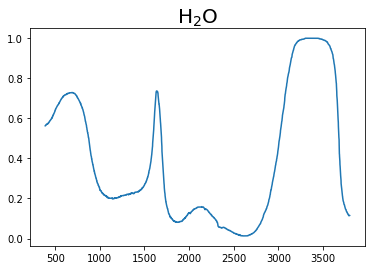

In [5]:
plt.plot(data2['x'], data2['y'])
plt.title('H$_{2}$O', fontsize=20)

In [6]:
data3 = jcamp.JCAMP_reader('74-82-8-IR.jdx')

In [7]:
y_abs = 1 - data3['y']
data3['yunits'] = 'ABSORBANCE'
data3['y'] = y_abs

Text(0.5, 1.0, 'methane')

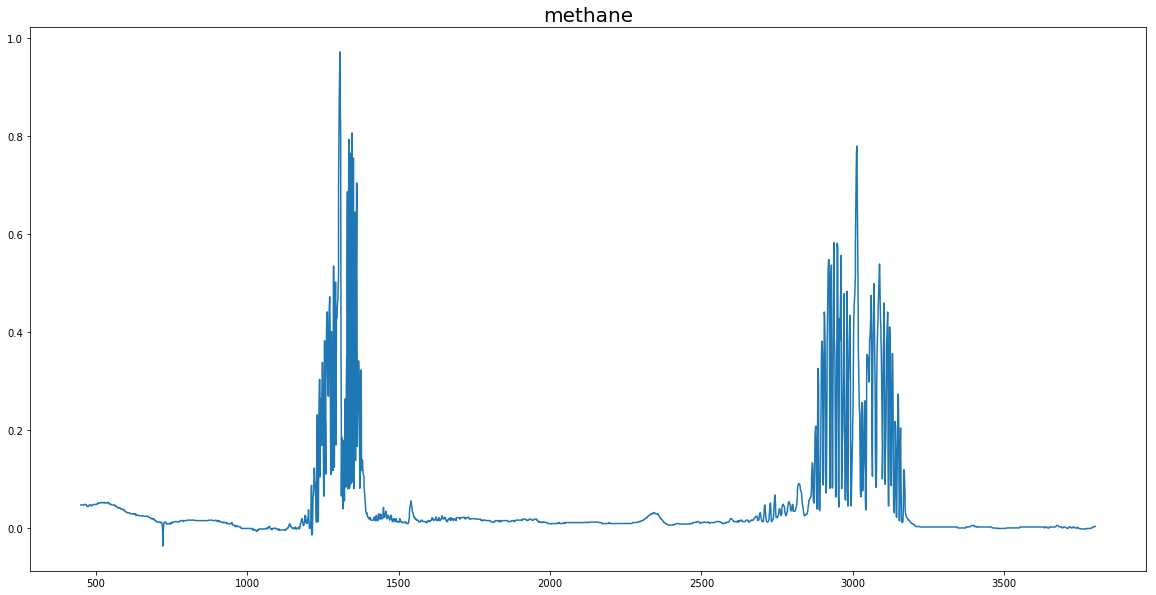

In [8]:
plt.figure(figsize=(20,10))
plt.plot(data3['x'], data3['y'])
plt.title('methane', fontsize=20)

In [9]:
# import CO2 .jdx
CO2_data = jcamp.JCAMP_reader('124-38-9-IR.jdx')

In [10]:
y_abs = 1 - CO2_data['y']
CO2_data['yunits'] = 'ABSORBANCE'
CO2_data['y'] = y_abs

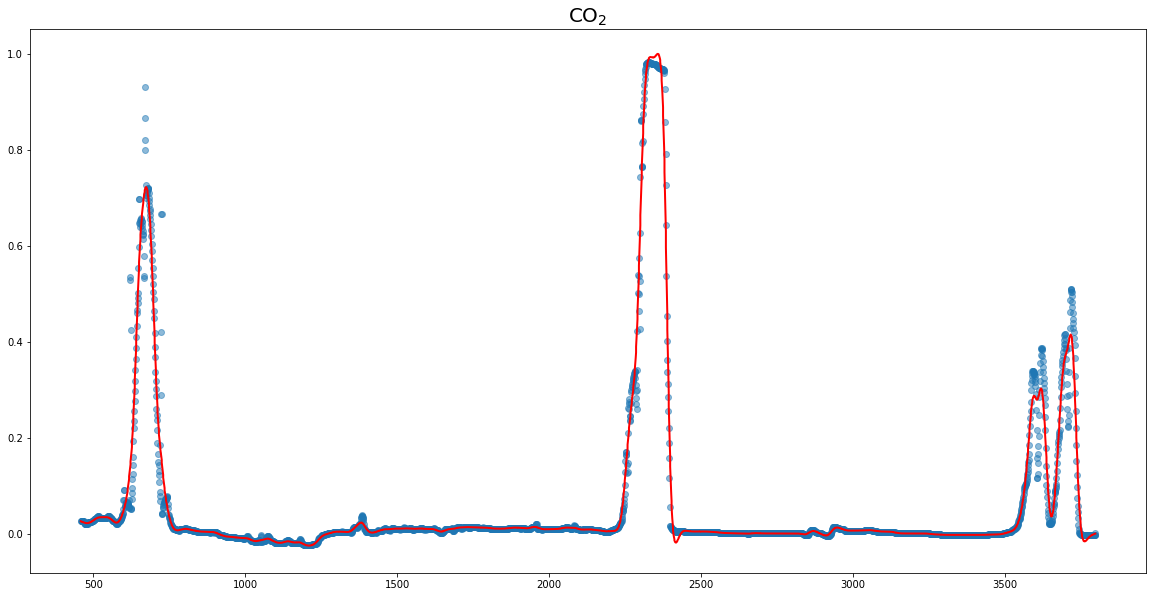

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(CO2_data['x'], CO2_data['y'], alpha=0.5)
plt.title('CO$_{2}$', fontsize=20)

# rampy smoothing
y_smo = rp.smooth(CO2_data['x'], CO2_data['y'], method='whittaker', Lambda=5000)
plt.plot(CO2_data['x'], y_smo, color='red', linewidth=2)

/Users/Parker1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


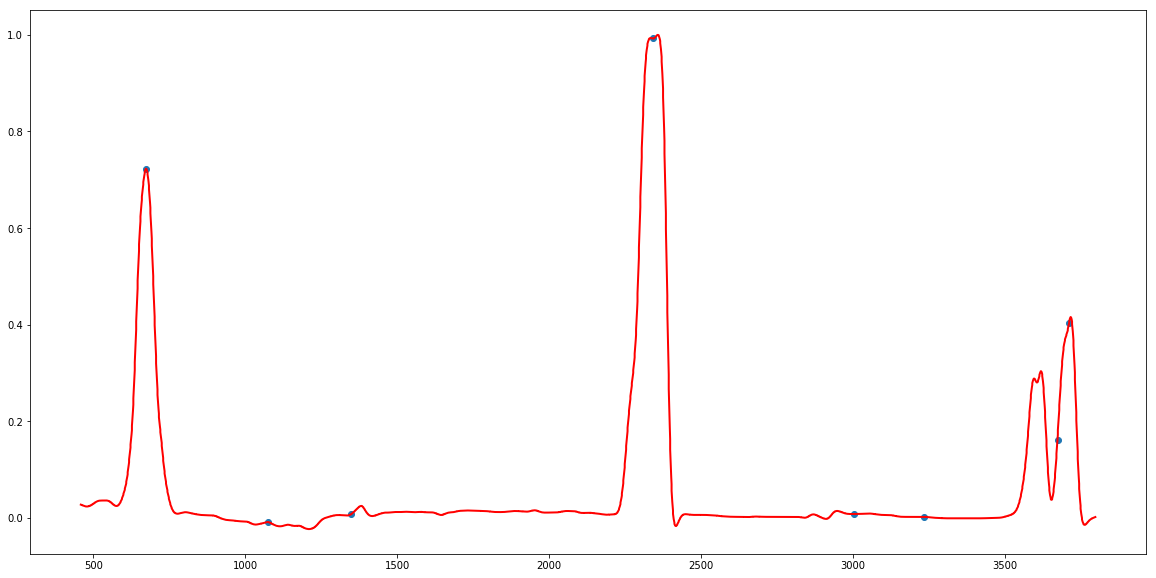

In [12]:
# scipy.signal.find_peaks_cwt
# wish there was a minimum peak height
peaks = scipy.signal.find_peaks_cwt(y_smo, widths=np.arange(1,200,20),
                                    min_snr=1)

plt.figure(figsize=(20,10))
plt.plot(CO2_data['x'], y_smo, color='red', linewidth=2)

peak_x = []
peak_y = []
for i in peaks:
    peak_x.append(CO2_data['x'][i])
    peak_y.append(y_smo[i])
    
plt.scatter(peak_x, peak_y)

In [14]:
# peakdetect (Copyright (C) 2016 Sixten Bergman)
import peakdetect

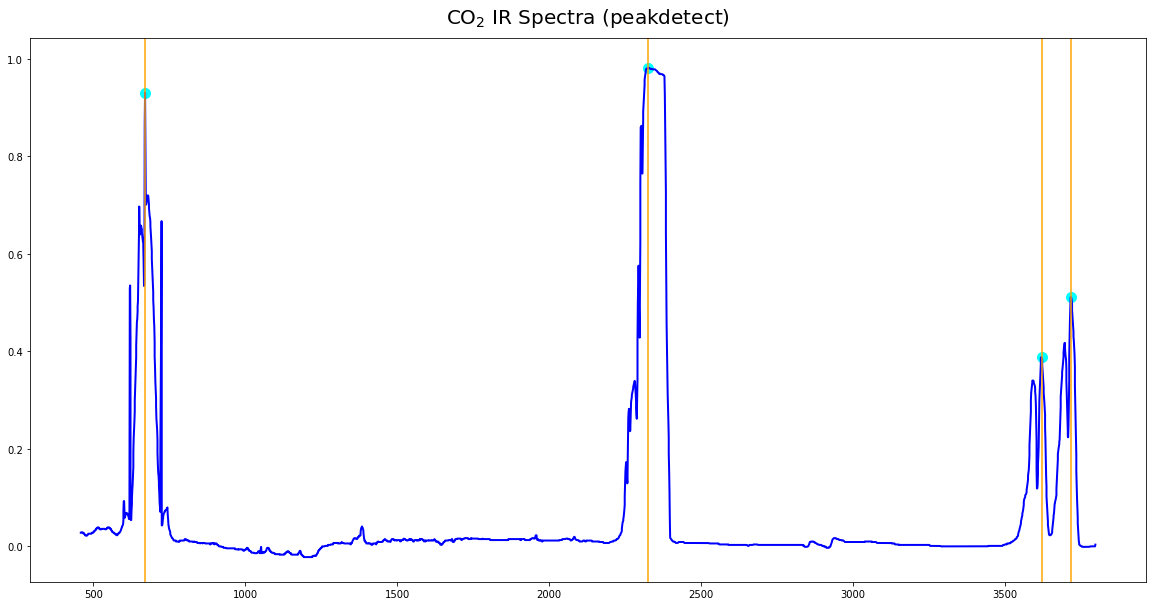

In [66]:
peaks = peakdetect.peakdetect(CO2_data['y'], CO2_data['x'], lookahead=50, delta=0)[0]
min_peak_height = 0.1

plt.figure(figsize=(20,10))
plt.title('CO$_{2}$ IR Spectra (peakdetect)', fontsize=20, pad=15)
plt.plot(CO2_data['x'], CO2_data['y'], color='blue', linewidth=2)

for i in range(len(peaks)):
    if peaks[i][1] <= min_peak_height:
        pass
    else:
        plt.scatter(peaks[i][0], peaks[i][1], color='cyan', s=100)
        plt.axvline(x=peaks[i][0], color='orange')
        
# plt.savefig('CO2 peakdetect.png')